In [1]:
'''This program analyzes the coffee consumption, production, export and imports among various countries and answers some key questions'''

# importing the required libraries
# Need Numpy to perform the array operations
import numpy as np
# We use pandas to read the csv files and load them into data frames
import pandas as pd
# we use matplotlib for ploting graphs and charts
import matplotlib as mp
import matplotlib.pyplot as pp

# Load the data

In [2]:
# Loading coffee consumption data into data frame
# The data contains one column for the country name and one column each for the years 1990 till 2018
# The units of measure are in thousands 60-Kg bags
consumption_data = pd.read_csv('inputs/domestic-consumption.csv',delimiter=',')
# Merging any duplicates
consumption_data = consumption_data.groupby("domestic_consumption", as_index=True).sum()
# Checking the data after loadin into the data frame
consumption_data.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
domestic_consumption,,,,,,,,,,,,,,,,,,,,,
Angola,20.0,30.0,35.0,20.00,25.0,10.0,20.0,40.0,30.0,20.0,...,30.000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
Benin,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia (Plurinational State of),25.0,27.0,27.5,28.50,29.5,30.5,31.5,32.5,33.0,34.0,...,46.000,47.5,49.0,50.5,52.0,53.5,55.0,57.0,58.5,60.0
Brazil,8200.0,8500.0,8900.0,9100.00,9300.0,10100.0,11000.0,11500.0,12200.0,12700.0,...,18390.000,19132.0,19720.0,20330.0,20085.0,20333.0,20508.0,21225.0,21997.0,22250.0
Burundi,2.0,1.6,1.7,1.91,2.0,2.0,2.0,2.0,2.0,2.0,...,1.399,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [3]:
# Loading the coffee production data into the data frames
# The data contains one column for the country name and one column each for the years 1990 till 2018
# The units of measure are in thousands 60-Kg bags
production_data = pd.read_csv('inputs/total-production.csv', delimiter=',')
production_data = production_data.groupby("total_production", as_index=True).sum()
# Checking the data after loading
production_data.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
total_production,,,,,,,,,,,,,,,,,,,,,
Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,54.9390,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
Benin,0.0000,0.0000,1.8050,0.0500,0.000,0.0000,0.000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,157.7020,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,47577.8065,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,350.5500,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206


In [4]:
# Laoding the prices paid to grower in each country into the data frame
# The data contains one column for the country name and one column each for the years 1990 till 2018
# The units of measure are in USD/Kg
prices_paid_to_farmers = pd.read_csv('inputs/prices-paid-to-growers.csv', delimiter=',')
prices_paid_to_farmers = prices_paid_to_farmers.groupby("prices_paid_to_growers", as_index=True).mean()
# Displaying the first 5 rows for verification
prices_paid_to_farmers.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
prices_paid_to_growers,,,,,,,,,,,,,,,,,,,,,
Brazil,0.984254,0.789049,0.803461,0.975950,2.207448,2.351244,1.833606,2.464297,2.019828,1.445841,...,1.922988,2.298156,3.637459,2.833251,2.068699,2.382567,1.964829,2.214220,2.303390,1.746153
Colombia,1.534724,1.481790,1.204656,1.106477,1.898327,2.199185,2.065245,2.939673,2.253433,1.906905,...,3.067442,3.985616,5.290868,3.679737,2.514539,3.525662,2.635854,2.727530,2.776185,2.505914
Dominican Republic,1.458168,1.382845,1.027841,1.172704,2.478234,2.412000,1.935342,3.673587,2.102616,1.637609,...,2.340731,3.071276,4.217812,3.262839,3.112084,4.052172,3.775011,3.911395,3.826974,3.391053
El Salvador,1.116194,0.983322,0.682322,0.780397,2.191177,2.218826,1.656073,2.762552,1.877384,1.256563,...,1.748205,2.425620,4.122256,2.651658,2.103276,2.582929,1.930439,1.976442,1.934159,1.645300
Ethiopia,1.348565,1.505322,1.351128,1.362442,2.418234,2.539011,1.495287,2.010060,2.027901,1.449113,...,1.701150,1.886530,3.211088,2.269088,1.618110,1.837430,1.678360,1.927316,1.799278,1.560234


In [5]:
# Loading the retail price of coffee in different countries
# The data contains one column for the country name and one column each for the years 1990 till 2018
# The units of measure are in USD/Kg
coffee_retail_price = pd.read_csv('inputs/retail-prices.csv', delimiter=',')
coffee_retail_price = coffee_retail_price.groupby("retail_prices", as_index=True).mean()
# Displaying the first 5 rows for verification
coffee_retail_price.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
retail_prices,,,,,,,,,,,,,,,,,,,,,
Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,7.240618,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,9.690949,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,8.675497,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,5.739514,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,5.629139,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [6]:
# Loading the exports of coffee crop by different countries
# The data contains one column for the country name and one column each for the years 1990 till 2018
# The units of measure are in thousands 60-Kg bags
coffee_exports = pd.read_csv('inputs/exports-crop-year.csv', delimiter=',')
coffee_exports = coffee_exports.groupby("exports_crop_year", as_index=True).sum()
# Displaying the first 5 rows for verification
coffee_exports.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
exports_crop_year,,,,,,,,,,,,,,,,,,,,,
Angola,79.3450,74.3310,67.5200,27.6080,11.802,48.1090,50.925,54.330,55.3440,39.9390,...,3.4200,4.9700,8.7150,7.7900,4.9350,9.4050,10.5150,14.8300,5.0060,10.3874
Benin,0.0000,0.0000,1.8050,0.0500,0.000,0.0000,0.000,0.000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Bolivia (Plurinational State of),111.9770,82.9360,100.9350,36.5230,85.944,110.4850,105.079,109.219,100.9850,122.7020,...,82.4751,69.7249,82.8354,54.7812,67.9122,46.3766,29.2191,20.9835,25.3112,22.5687
Brazil,17862.6286,21808.4934,16752.3542,18760.9786,15958.047,13760.2022,17259.743,15352.004,21084.8533,21185.8065,...,30254.8120,34054.4102,32148.8289,29283.0012,32751.9664,37781.7669,37472.5876,33491.1784,30782.8635,37613.8836
Burundi,412.3930,762.4910,671.6460,352.8700,580.127,464.0700,185.636,546.034,391.8500,437.7990,...,172.9370,350.7196,202.1328,405.9615,159.2177,245.5500,274.1017,246.7933,195.1079,179.9206


## Cleaning the data

In [7]:
consumption_data.isnull().sum().sum()

0

In [8]:
production_data.isnull().sum().sum()

0

In [9]:
prices_paid_to_farmers.isnull().sum().sum()

0

In [10]:
coffee_retail_price.isnull().sum().sum()

0

In [11]:
coffee_exports.isnull().sum().sum()

0

## Graph of brazil production data
In this section we try to graph the production of Brazil over the years

In [12]:
# Defining a function to draw line chart using matplotlib so that we can reuse the code
def plotLineGraph(df, countriesList, colorList):
    x = np.arange(len(df.columns))
    for country in countriesList:
        t = np.array(df[df.index == country])[0]
        pp.plot(x, t, label=country, color=colorList[countriesList.index(country)])
    pp.xticks(x,np.array(df.columns))
    pp.xticks(rotation=90)
    pp.legend()
    pp.show()

# Default colors used in the code
colorsList = list(['#1f77b4','red','green'])

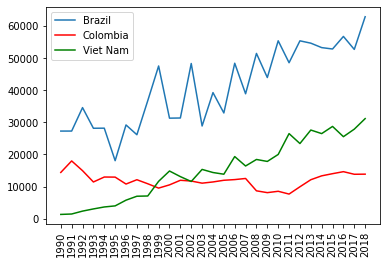

In [13]:
# Let us now see how are the production numbers for the coffee crop they grew in Brazil, Columbia and Viet Nam
plotLineGraph(production_data, list(['Brazil', 'Colombia', 'Viet Nam']), colorsList)

## Graph of brazil consumption data
In this section we try to graph the consumption of Brazil over the years

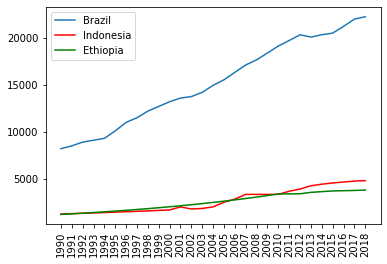

In [14]:
# Let us now see how are the production numbers for the coffee crop they grew in Brazil, Columbia and Viet Nam
plotLineGraph(consumption_data, list(['Brazil', 'Indonesia', 'Ethiopia']), colorsList)

As we can see, Consumption and production are high in Brazil than any other country

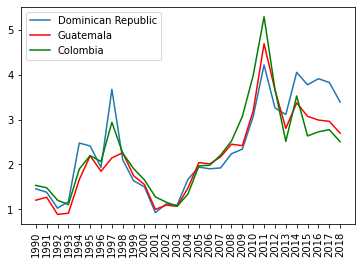

In [15]:
# Let us now see how are the farmers paid for the coffee crop they grew in Brazil, Columbia and India
plotLineGraph(prices_paid_to_farmers, list(['Dominican Republic', 'Guatemala', 'Colombia']), list(['#1f77b4','red','green']))

As we can see Prices of the top coffee expensive countries varies by time. In the recent years prices of coffee are trnding higher in Dominican Republic than other two countries

## Taking average of last five years
In order to bertter analyze the data and to eliminate noise I have choosen to take average of last five years of data

In [16]:
# Defining a function to compute Five Year Average
def computeFiveYearAvg(df):
    # We then sum up the values of the last five years and divide the sum by 5 to get the average
    df['Five_year_avg'] = (df['2014'] + df['2015'] + df['2016'] + df['2017'] + df['2018'])/5

    # consumption_data.reset_index(inplace=True)
    # We then create a new data frame with the calculated values
    avg_df = pd.DataFrame(data={'Country': np.array(df.index),'Five_year_avg': np.array(df.Five_year_avg)})
    avg_df.set_index('Country', inplace=True)
    
    return avg_df

In [17]:
# Computing the Five Year avg for consumption data
avg_consumption_data = computeFiveYearAvg(consumption_data)
# Checking if the data frame is right
avg_consumption_data.head(5)

,Five_year_avg
Country,
Angola,30.0
Benin,0.0
Bolivia (Plurinational State of),56.8
Brazil,21262.6
Burundi,2.0


In [18]:
# Computing the Five Year avg for production data
avg_production_data = computeFiveYearAvg(production_data)
# Checking if the data frame is right
avg_production_data.head(5)

,Five_year_avg
Country,
Angola,40.02868
Benin,0.00000
Bolivia (Plurinational State of),85.69182
Brazil,55725.65600
Burundi,230.19470


In [19]:
# Computing the Five Year avg for Prices paid to farmers data
avg_prices_paid_to_farmers = computeFiveYearAvg(prices_paid_to_farmers)
# Checking if the data frame is right
avg_prices_paid_to_farmers.head(5)

,Five_year_avg
Country,
Brazil,2.122232
Colombia,2.834229
Dominican Republic,3.791321
El Salvador,2.013854
Ethiopia,1.760524


In [20]:
# Computing the Five Year avg for Coffee retail price data
avg_coffee_retail_price = computeFiveYearAvg(coffee_retail_price)
# Checking if the data frame is right
avg_coffee_retail_price.head(5)

,Five_year_avg
Country,
Austria,15.258278
Cyprus,12.525386
Denmark,12.163355
Finland,8.927152
France,7.602649


In [21]:
# Computing the Five Year avg for coffee exports data
avg_coffee_exports = computeFiveYearAvg(coffee_exports)
# Checking if the data frame is right
avg_coffee_exports.head(5)

,Five_year_avg
Country,
Angola,10.02868
Benin,0.00000
Bolivia (Plurinational State of),28.89182
Brazil,35428.45600
Burundi,228.29470


## Which country consumes more coffee?
For this we need to sort the consumption data and get the coutry that consumes coffee most

In [22]:
# Extracting the country which has highest coffee consumption
max_consumption_country = avg_consumption_data[avg_consumption_data.Five_year_avg == np.max(avg_consumption_data.Five_year_avg)]
# Displaying the result
max_consumption_country

,Five_year_avg
Country,
Brazil,21262.6


## Which countries have exccess coffee production or highest coffee deficit?
For this we need to take off the consumption numbers from the production for each country

In [23]:
# Extracting the Five Year Avg coffee production and consumption data
avg_consumption_data = avg_consumption_data.rename(columns={'Five_year_avg':'Five_year_avg_consumption'})
avg_production_data=avg_production_data.rename(columns={'Five_year_avg':'Five_year_avg_production'})

# Merging the two datasets using the Country as the join column
production_consumption = pd.merge(avg_consumption_data,avg_production_data, on='Country')
# Displaying the results of the join
production_consumption.head(5)

,Five_year_avg_consumption,Five_year_avg_production
Country,,
Angola,30.0,40.02868
Benin,0.0,0.00000
Bolivia (Plurinational State of),56.8,85.69182
Brazil,21262.6,55725.65600
Burundi,2.0,230.19470


In [24]:
# Subtracting the consumption values from production values for each country to get the excess coffee the countries are producing
production_consumption['excess_production'] = production_consumption.Five_year_avg_production - production_consumption.Five_year_avg_consumption

# Calculating the mean of production and consumption values across countries
production_consumption['mean_production'] = np.mean(production_consumption.Five_year_avg_production)
production_consumption['mean_consumption'] = np.mean(production_consumption.Five_year_avg_consumption)

# Filtering the countries which are deficit in coffee production
Excess_producing_countries = production_consumption[production_consumption.excess_production > 0]

# Displaying the excess coffee production in tabular form
production_consumption.head(5)

,Five_year_avg_consumption,Five_year_avg_production,excess_production,mean_production,mean_consumption
Country,,,,,
Angola,30.0,40.02868,10.02868,2830.954115,867.873341
Benin,0.0,0.00000,0.00000,2830.954115,867.873341
Bolivia (Plurinational State of),56.8,85.69182,28.89182,2830.954115,867.873341
Brazil,21262.6,55725.65600,34463.05600,2830.954115,867.873341
Burundi,2.0,230.19470,228.19470,2830.954115,867.873341


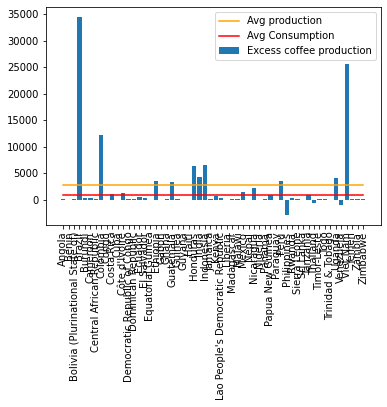

In [25]:
pp.bar(x=np.array(production_consumption.index), height=np.array(production_consumption.excess_production), align='center', label='Excess coffee production')
pp.xticks(rotation = 90)
pp.plot(np.array(production_consumption.index), production_consumption.mean_production, color='orange', label="Avg production")
pp.plot(np.array(production_consumption.index), production_consumption.mean_consumption, color='red', label="Avg Consumption")
pp.legend()
pp.show()

In [26]:
# Extracting the country that has maxmimum coffee surplus production
max_surplus_country = production_consumption[production_consumption.excess_production == np.max(production_consumption.excess_production)]

# Displaying the result
max_surplus_country

,Five_year_avg_consumption,Five_year_avg_production,excess_production,mean_production,mean_consumption
Country,,,,,
Brazil,21262.6,55725.656,34463.056,2830.954115,867.873341


In [27]:
# Extracting the country that has maximum coffe deficit
max_deficit_country = production_consumption[production_consumption.excess_production == np.min(production_consumption.excess_production)]
# Displaying the results
max_deficit_country

,Five_year_avg_consumption,Five_year_avg_production,excess_production,mean_production,mean_consumption
Country,,,,,
Philippines,3062.0,205.09132,-2856.90868,2830.954115,867.873341


## Which country has best coffee production 

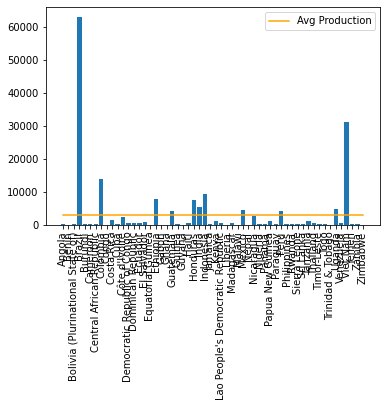

In [28]:
production_data['mean_production_2018'] = np.mean(production_data['2018'])
pp.bar(np.array(production_data.index), np.array(production_data['2018']))
pp.xticks(rotation=90)
pp.plot(np.array(production_data.index), np.array(production_data.mean_production_2018), color='orange', label='Avg Production')
pp.legend()
pp.show()

In [29]:
# Extracting the country having the highest coffee production
max_production_country = production_data[production_data['2018'] == np.max(production_data['2018'])]
# Displaying the results
max_production_country

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,Five_year_avg,mean_production_2018
total_production,,,,,,,,,,,,,,,,,,,,,
Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,47577.8065,...,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836,55725.656,3052.441745


In [30]:
# Extracting the country which has minimum coffee production
min_production_country = production_data[production_data['2018'] == np.min(production_data['2018'])]
# Displaying the results
min_production_country

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,Five_year_avg,mean_production_2018
total_production,,,,,,,,,,,,,,,,,,,,,
Benin,0.0,0.0,1.805,0.05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3052.441745


It seems Brazil has the highest coffee production which is 62925 thousand 60Kg bags while Benin has not produced any coffee since 1990

## How are farmers paid for the coffee they grow in each country
For this lets compare the crop price, retail price of coffee across countries

In [31]:
# Extracting the prices paid to farmers in 2018 and using the logarthimic function to reduce the gap
prices_paid = np.log(prices_paid_to_farmers[['2018']])
# Extracting the production values for 2018
coffee_production = np.log(production_data[['2018']])

# Renaming the column names to be clear during the merge operation
prices_paid = prices_paid.rename(columns={'2018':'price_paid_to_growers_2018'})
coffee_production = coffee_production.rename(columns={'2018':'production_2018'})

#Joining th etwo datasets on Country
production_prices = prices_paid.join(coffee_production, how='inner')

# Displaying the result
production_prices.head(5)

,price_paid_to_growers_2018,production_2018
Brazil,0.557415,11.049697
Colombia,0.918654,9.536615
Dominican Republic,1.221140,6.065899
El Salvador,0.497923,6.634532
Ethiopia,0.444836,8.958826


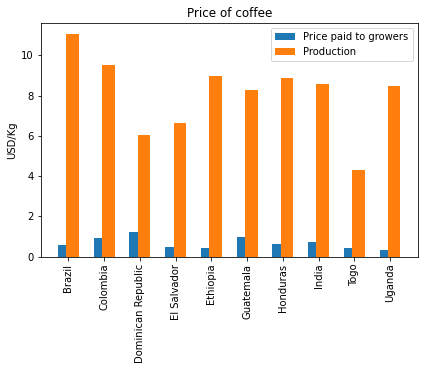

In [32]:
x = np.arange(len(production_prices.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pp.subplots()
rects1 = ax.bar(x - width/3, production_prices.price_paid_to_growers_2018, width, label='Price paid to growers')
rects2 = ax.bar(x + width/3, production_prices.production_2018, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('USD/Kg')
ax.set_title('Price of coffee')
ax.set_xticks(x)
ax.set_xticklabels(production_prices.index)
ax.legend()

fig.tight_layout()
pp.xticks(rotation=90)
pp.legend()
pp.show()

## Which countries export most of the coffee?

In [33]:
avg_coffee_exports.head(5)

,Five_year_avg
Country,
Angola,10.02868
Benin,0.00000
Bolivia (Plurinational State of),28.89182
Brazil,35428.45600
Burundi,228.29470


/Users/seshumiriyala/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


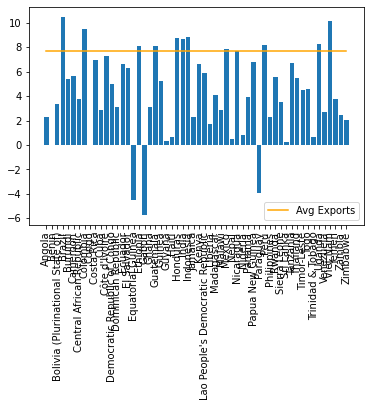

In [34]:
# Charting the Export values
avg_coffee_exports['mean_export_2018'] = np.mean(avg_coffee_exports.Five_year_avg)
pp.bar(np.array(avg_coffee_exports.index), np.array(np.log(avg_coffee_exports.Five_year_avg)))
pp.xticks(rotation=90)
pp.plot(np.array(avg_coffee_exports.index), np.array(np.log(avg_coffee_exports.mean_export_2018)), color='orange', label='Avg Exports')
pp.legend()
pp.show()

In [35]:
# Extracting the maximum coffee exporting country
max_exporting_country = avg_coffee_exports[avg_coffee_exports['Five_year_avg'] == np.max(avg_coffee_exports['Five_year_avg'])]
# Displaying the results
max_exporting_country

,Five_year_avg,mean_export_2018
Country,,
Brazil,35428.456,2136.673436


## Forecasting the 2019 production and consumption for Brazil

In [36]:
# Forecating the production and consumption values using simple moving average
consumption_data_transposed = consumption_data.T
consumption_data_transposed['SMA_3'] = consumption_data_transposed.iloc[:,3].rolling(window=3).mean()
consumption_data_transposed.head(5)

domestic_consumption,Angola,Benin,Bolivia (Plurinational State of),Brazil,Burundi,Cameroon,Central African Republic,Colombia,Congo,Costa Rica,...,Timor-Leste,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe,SMA_3
1990,20.0,0.0,25.0,8200.0,2.00,83.300,28.0,1235.0,3.000,375.0,...,0.0,1.0,8.0,70.0,782.39,150.0,0.0,1.500,8.000,NaN
1991,30.0,0.0,27.0,8500.0,1.60,83.333,28.0,1269.0,2.667,375.0,...,0.0,1.0,11.5,75.0,815.48,230.0,0.0,1.500,8.000,NaN
1992,35.0,0.0,27.5,8900.0,1.70,83.333,28.0,1303.0,2.667,375.0,...,0.0,1.0,10.0,75.0,849.97,250.0,0.0,1.432,8.000,8533.333333
1993,20.0,0.0,28.5,9100.0,1.91,100.000,25.0,1339.0,3.000,375.0,...,0.0,1.0,10.0,75.0,885.93,267.0,0.0,1.000,8.333,8833.333333
1994,25.0,0.0,29.5,9300.0,2.00,100.000,15.0,1375.0,3.000,375.0,...,0.0,1.0,14.0,80.0,923.40,267.0,0.0,1.500,8.333,9100.000000


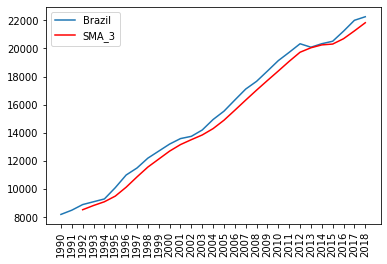

In [37]:
# Let us now use the data to predict the coffee consumption for Brazil in 2019 and chart it
consumption_data_normal = consumption_data_transposed.T
del consumption_data_normal['Five_year_avg']
plotLineGraph(consumption_data_normal, list(['Brazil', 'SMA_3']), list(['#1f77b4','red']))

In [38]:
# Consumption values for Brazil in 2019 is
brazil_consumption_2019 = (consumption_data_normal[consumption_data_normal.index == 'SMA_3']['2018'] + consumption_data_normal[consumption_data_normal.index == 'SMA_3']['2017'] + consumption_data_normal[consumption_data_normal.index == 'SMA_3']['2016'])/3

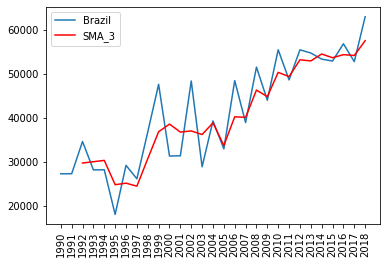

In [39]:
# Let us now see how are the farmers paid for the coffee crop they grew in Brazil, Columbia and India
# Forecating the production values using simple moving average
production_data_transposed = production_data.T
production_data_transposed['SMA_3'] = production_data_transposed.iloc[:,3].rolling(window=3).mean()

production_data_normal = production_data_transposed.T

del production_data_normal['Five_year_avg']
del production_data_normal['mean_production_2018']
plotLineGraph(production_data_normal, list(['Brazil', 'SMA_3']), list(['#1f77b4','red']))

In [40]:
# Production values for Brazil in 2019 is

brazil_production_2019 = (production_data_normal[production_data_normal.index == 'SMA_3']['2018'] + production_data_normal[production_data_normal.index == 'SMA_3']['2017'] + production_data_normal[production_data_normal.index == 'SMA_3']['2016'])/3

In [41]:

print("Coffee production in Brazil for 2019 is", brazil_production_2019.values[0], "(In thousand 60-kg bags)")
print("Coffee consumption in Brazil for 2019 is", brazil_consumption_2019.values[0], "(In thousand 60-kg bags)")

Coffee production in Brazil for 2019 is 55312.78754444444 (In thousand 60-kg bags)
Coffee consumption in Brazil for 2019 is 21252.0 (In thousand 60-kg bags)
